### Обзор набора данных по Титанику.

PassengerId - это уникальный идентификатор строки, который не влияет на цель.

Survived - целевая переменная, которую мы пытаемся предсказать (0 или 1):
1 = Выжил 0 = не выжил

Pclass (Passenger Class) - социально-экономический статус пассажира, это категориальная порядковая характеристика, которая имеет 3 уникальных значения (1, 2 или 3):
1 = Высший класс
2 = Средний класс
3 = Низший класс

Name (Имя), Sex (пол) и Age (возраст) не требуют пояснений.

SibSp - общее количество братьев, сестер и супругов пассажира.

Parch - общее количество родителей и детей пассажира.

Ticket - номер билета пассажира.

Fare - тариф пассажира.

Cabin - номер каюты пассажира.

Embarked - порт посадки, это категориальный признак, который имеет 3 уникальных значения (C, Q или S):
C = Шербур Q = Квинстаун S = Саутгемптон

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
test = pd.read_csv('test.csv')

train = pd.read_csv('train.csv')

gender = pd.read_csv('gender_submission.csv')

### EDA - разведочный анализ данных 

##### Тренировочные данные содержат 891 строку, а тестовые данные - 418 строк.
Тренировочные данные имеют 12 признаков, а тестовые - 11 признаков. Одна дополнительная функция в тренировочных данных - функция Survived, которая является целевой переменной.

In [3]:
train.info()
print('_'*40)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenger

##### Пропущенные значения.

Как видно из приведенной ниже таблицы, некоторые столбцы имеют пропущенные значения.

В тренировочных данных отсутствуют значения в столбцах Age, Cabin и Embarked. В тестовых данных отсутствуют значения в столбцах Age, Cabin и Fare. 

In [4]:
print(train.isnull().sum())
print('_'*40)
print(test.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
________________________________________
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


##### Объединение тренировочного и тестового набора данных.

При работе с отсутствующими значениями удобно работать с объединенным тренировочным и тестовым набором, иначе заполненные данные могут чрезмерно соответствовать образцам тренировочного или тестового набора.

In [5]:
y = train['Survived']

In [6]:
train['is_test'] = 0
test['is_test'] = 1

In [7]:
df = pd.concat([train, test])

In [8]:
df = df.reset_index(drop=True)

In [9]:
df 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,is_test
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,1
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,1
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,1
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,1


---
---

In [10]:
print("Процент пропущенных значений в столбце Age:")
round(sum(df['Age'].isnull())/len(df)*100, 2)

Процент пропущенных значений в столбце Age:


20.09

In [11]:
print("Процент пропущенных значений в столбце Cabin:")
round(sum(df['Cabin'].isnull())/len(df)*100, 2)

Процент пропущенных значений в столбце Cabin:


77.46

In [12]:
print("Процент пропущенных значений в столбце Embarked:")
round(sum(df['Embarked'].isnull())/len(df)*100, 2)

Процент пропущенных значений в столбце Embarked:


0.15

In [13]:
print("Процент пропущенных значений в столбце Fare:")
round(sum(df['Fare'].isnull())/len(df)*100, 2)

Процент пропущенных значений в столбце Fare:


0.08

##### Я оставил значения признака Survived для объединенных данных, для дальнейшей работы по визуализации выживших и погибших.
Естественно, пропущенные значения в тестовом наборе данных (418) в данном случае просто игонорируются.

In [14]:
print(df.isnull().sum())

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
is_test           0
dtype: int64


Признак Cabin и Embarked я удаляю, т к они не несут никакого смысла в наборе. При том Cabin не заполнен на 77 %, а те варианты заполнения которые я мог произвести не добавляют смысла признаку.

In [15]:
df = df.drop(['Cabin','Embarked'], axis=1)

Отсутствующие значения в Age, и Fare можно заполнить с помощью описательных статистических мер.

#####  Fare / Тариф
Есть только один пассажир с отсутствующим значением Fare. Можно предположить, что Fare связан с размером семьи (Parch и SibSp) и характеристиками Pclass. Медианное значение Fare мужчины с билетом третьего класса и без семьи является логичным выбором для заполнения недостающего значения.

In [16]:
df[df['Fare'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,is_test
1043,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,1


In [17]:
med_fare = df.groupby(['Pclass', 'Parch', 'SibSp']).Fare.median()[3][0][0]

df['Fare'] = df['Fare'].fillna(med_fare)

##### Age / Возраст

Недостающие значения в параметре Возраст заполняются медианным возрастом. Но использование медианного возраста всего набора данных не является хорошим выбором. Медианный возраст признака Pclass является лучшим выбором из-за его высокой корреляции с возрастом (0,408106). Кроме того, логичнее группировать возраст по классам пассажиров, а не по другим признакам.

In [18]:
df.corr()['Age'].sort_values()

Pclass        -0.408106
SibSp         -0.243699
Parch         -0.150917
Survived      -0.077221
is_test        0.018528
PassengerId    0.028814
Fare           0.177278
Age            1.000000
Name: Age, dtype: float64

Для большей точности признак Sex используется в качестве второго уровня группировки при заполнении недостающих значений Age. Как видно из нижеприведеных данных, группы Pclass и Sex имеют разные значения медианного возраста. 

In [19]:
age_by_pclass_sex = df.groupby(['Sex', 'Pclass']).median()['Age']

for pclass in range(1, 4):
    for sex in ['female', 'male']:
        print('Median age of Pclass {} {}s: {}'.format(pclass, sex, age_by_pclass_sex[sex][pclass]))
print('Median age of all passengers: {}'.format(df['Age'].median()))

Median age of Pclass 1 females: 36.0
Median age of Pclass 1 males: 42.0
Median age of Pclass 2 females: 28.0
Median age of Pclass 2 males: 29.5
Median age of Pclass 3 females: 22.0
Median age of Pclass 3 males: 25.0
Median age of all passengers: 28.0


In [20]:
df['Age'] = df.groupby(['Sex', 'Pclass'])['Age'].apply(lambda x: x.fillna(x.median()))

##### После заполнения недостающих значений в признаках и удаления некоторых признаков в обучающем и тестовом наборе не осталось ни одного недостающего значения.

In [21]:
print(df.drop('Survived', axis=1).isnull().sum())

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
is_test        0
dtype: int64


##### Целевое распределение признака Survived.

In [22]:
survived = train['Survived'].value_counts()[1]
not_survived = train['Survived'].value_counts()[0]

In [23]:
not_survived_per = round(not_survived / len(train)*100, 2)

In [24]:
survived_per = round(survived / len(train)*100, 2)

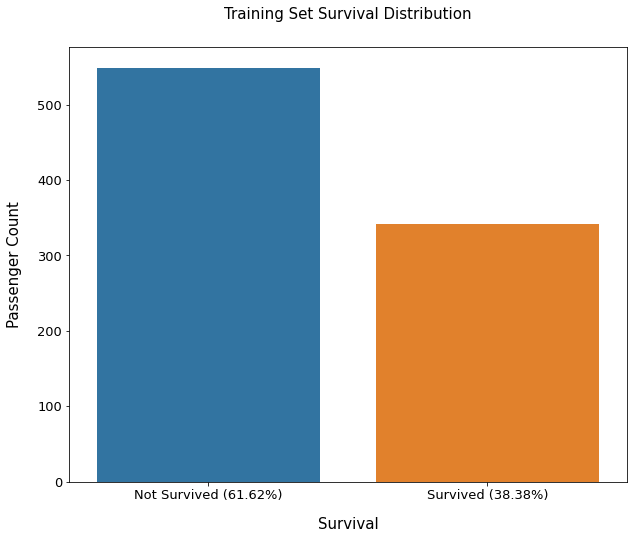

In [25]:
plt.figure(figsize=(10, 8))
sns.countplot(data=train, x='Survived')

plt.xticks((0, 1), ['Not Survived ({0:.2f}%)'.format(not_survived_per), 'Survived ({0:.2f}%)'.format(survived_per)])

plt.xlabel('Survival', size=15, labelpad=15)
plt.ylabel('Passenger Count', size=15, labelpad=15)
plt.tick_params(axis='x', labelsize=13)
plt.tick_params(axis='y', labelsize=13)

plt.title('Training Set Survival Distribution', size=15, y=1.05)

plt.show()

### Корреляции

Признаки сильно коррелируют друг с другом и зависят друг от друга. Самая высокая корреляция между признаками составляет 0,549500 в обучающем наборе и 0.577489 в тестовом наборе (между Fare и Pclass). Остальные признаки также имеют высокую корреляцию.

In [26]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'is_test'],
      dtype='object')

In [27]:
corr_train = df[df['is_test']==0].drop(['is_test'], axis=1)
corr_test = df[df['is_test']==1].drop(['is_test'], axis=1)

In [28]:
corr_train  = pd.get_dummies(corr_train[['Age', 'Fare', 'Parch', 'Pclass', 'Sex', 'SibSp', 'Survived']]).corr()

In [29]:
df_train_corr = corr_train.abs().unstack().sort_values(kind="quicksort", ascending=False).reset_index()
df_train_corr.rename(columns={"level_0": "Feature 1", "level_1": "Feature 2", 0: 'Correlation Coefficient'}, inplace=True)
df_train_corr.drop(df_train_corr.iloc[1::2].index, inplace=True)
df_train_corr_nd = df_train_corr.drop(df_train_corr[df_train_corr['Correlation Coefficient'] == 1.0].index)

In [30]:
corr = df_train_corr_nd['Correlation Coefficient'] > 0.3
df_train_corr_nd[corr]

,Feature 1,Feature 2,Correlation Coefficient
8,Sex_male,Sex_female,1.000000
10,Fare,Pclass,0.549500
12,Survived,Sex_male,0.543351
14,Survived,Sex_female,0.543351
16,Age,Pclass,0.417667
18,Parch,SibSp,0.414838
20,Survived,Pclass,0.338481


In [31]:
corr_test  = pd.get_dummies(corr_test[['Age', 'Fare', 'Parch', 'Pclass', 'Sex', 'SibSp']]).corr()

In [32]:
df_test_corr = corr_test.abs().unstack().sort_values(kind="quicksort", ascending=False).reset_index()
df_test_corr.rename(columns={"level_0": "Feature 1", "level_1": "Feature 2", 0: 'Correlation Coefficient'}, inplace=True)
df_test_corr.drop(df_test_corr.iloc[1::2].index, inplace=True)
df_test_corr_nd = df_test_corr.drop(df_test_corr[df_test_corr['Correlation Coefficient'] == 1.0].index)

In [33]:
corr = df_test_corr_nd['Correlation Coefficient'] > 0.3
df_test_corr_nd[corr]

,Feature 1,Feature 2,Correlation Coefficient
8,Sex_female,Sex_male,1.000000
10,Pclass,Fare,0.577489
12,Age,Pclass,0.526789
14,Age,Fare,0.345347
16,Parch,SibSp,0.306895


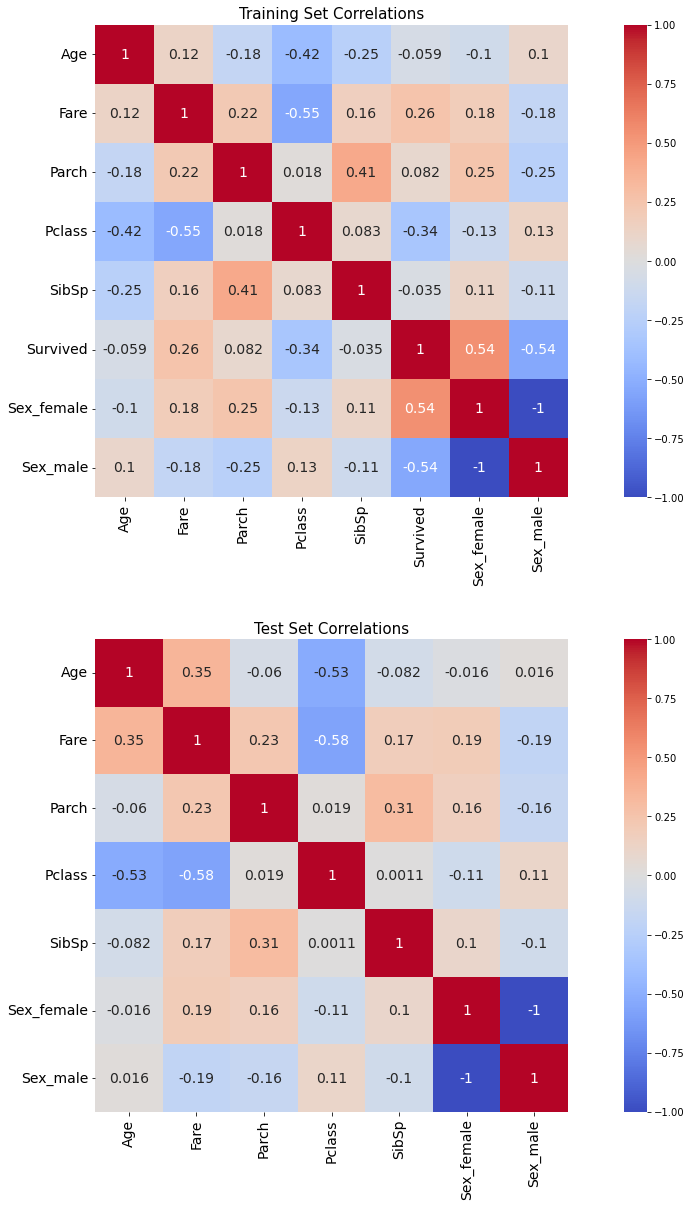

In [34]:
fig, axs = plt.subplots(nrows=2, figsize=(20, 20))

sns.heatmap(corr_train, ax=axs[0], annot=True, square=True, cmap='coolwarm', annot_kws={'size': 14})
sns.heatmap(corr_test, ax=axs[1], annot=True, square=True, cmap='coolwarm', annot_kws={'size': 14})

for i in range(2):    
    axs[i].tick_params(axis='x', labelsize=14, rotation=90)
    axs[i].tick_params(axis='y', labelsize=14, rotation=0)
    
axs[0].set_title('Training Set Correlations', size=15)

axs[1].set_title('Test Set Correlations', size=15)

fig.subplots_adjust(hspace=0.3)


plt.show()

##### Корреляция с целевым признаком Survived в тренировочном наборе.

Как видно из данных ниже, с целевым признаком хорошо коррелируют, пол Sex_male, Sex_female, класс каюты Pclass, Тариф Fare. При чем женский пол коррелирует положительно, а мужской пол отрицательно. 

In [35]:
corr_df  = pd.get_dummies(train[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch','Fare']]).corr()

In [36]:
Survived_corr = corr_df['Survived'].sort_values().iloc[0:-1]

In [37]:
Survived_corr

Sex_male     -0.543351
Pclass       -0.338481
Age          -0.077221
SibSp        -0.035322
Parch         0.081629
Fare          0.257307
Sex_female    0.543351
Name: Survived, dtype: float64

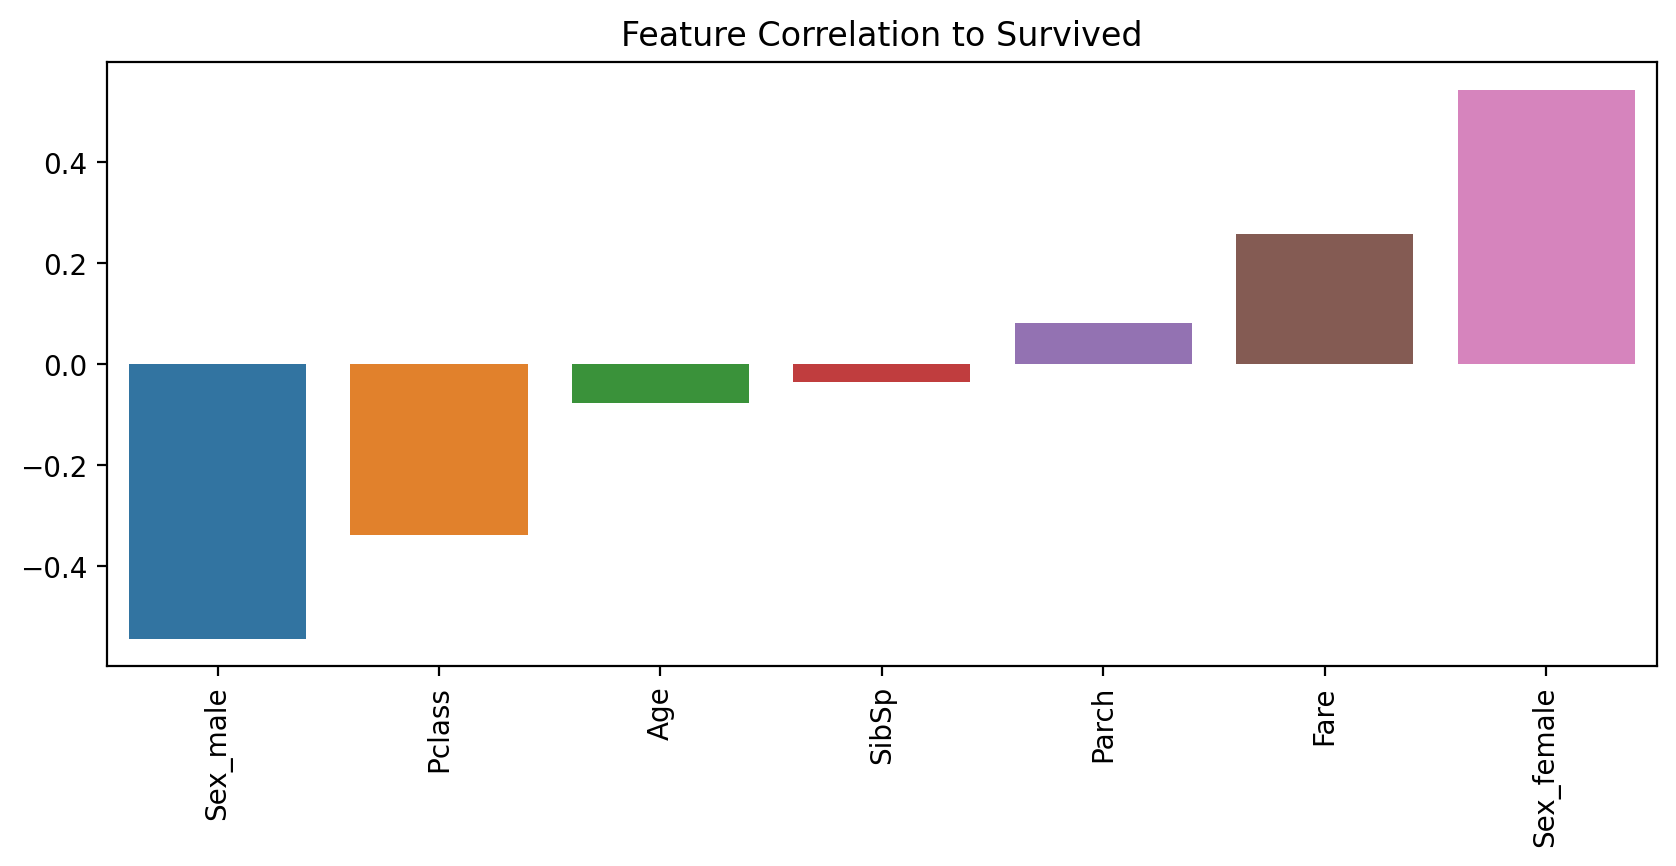

In [38]:
plt.figure(figsize=(10,4),dpi=200)
sns.barplot(x=Survived_corr.index, y=Survived_corr.values)
plt.title("Feature Correlation to Survived")
plt.xticks(rotation=90);

### Категориальные признаки.

Каждый категориальный признак имеет по крайней мере один класс с высоким уровнем смертности. Эти классы очень полезны для прогнозирования того, является ли пассажир выжившим или нет. Лучшими категориальными признаками являются Pclass и Sex, поскольку они имеют наиболее однородные распределения.

Логично, что в признаке Sex большой процент погибших мужчин, и что в признаке Pclass большой процент погибших из 3 класса. 

Признаки Parch и SibSp показывают, что пассажиры, имеющие только одного члена семьи, имеют более высокий уровень выживаемости.

In [39]:
df_train = df[df['is_test']==0]

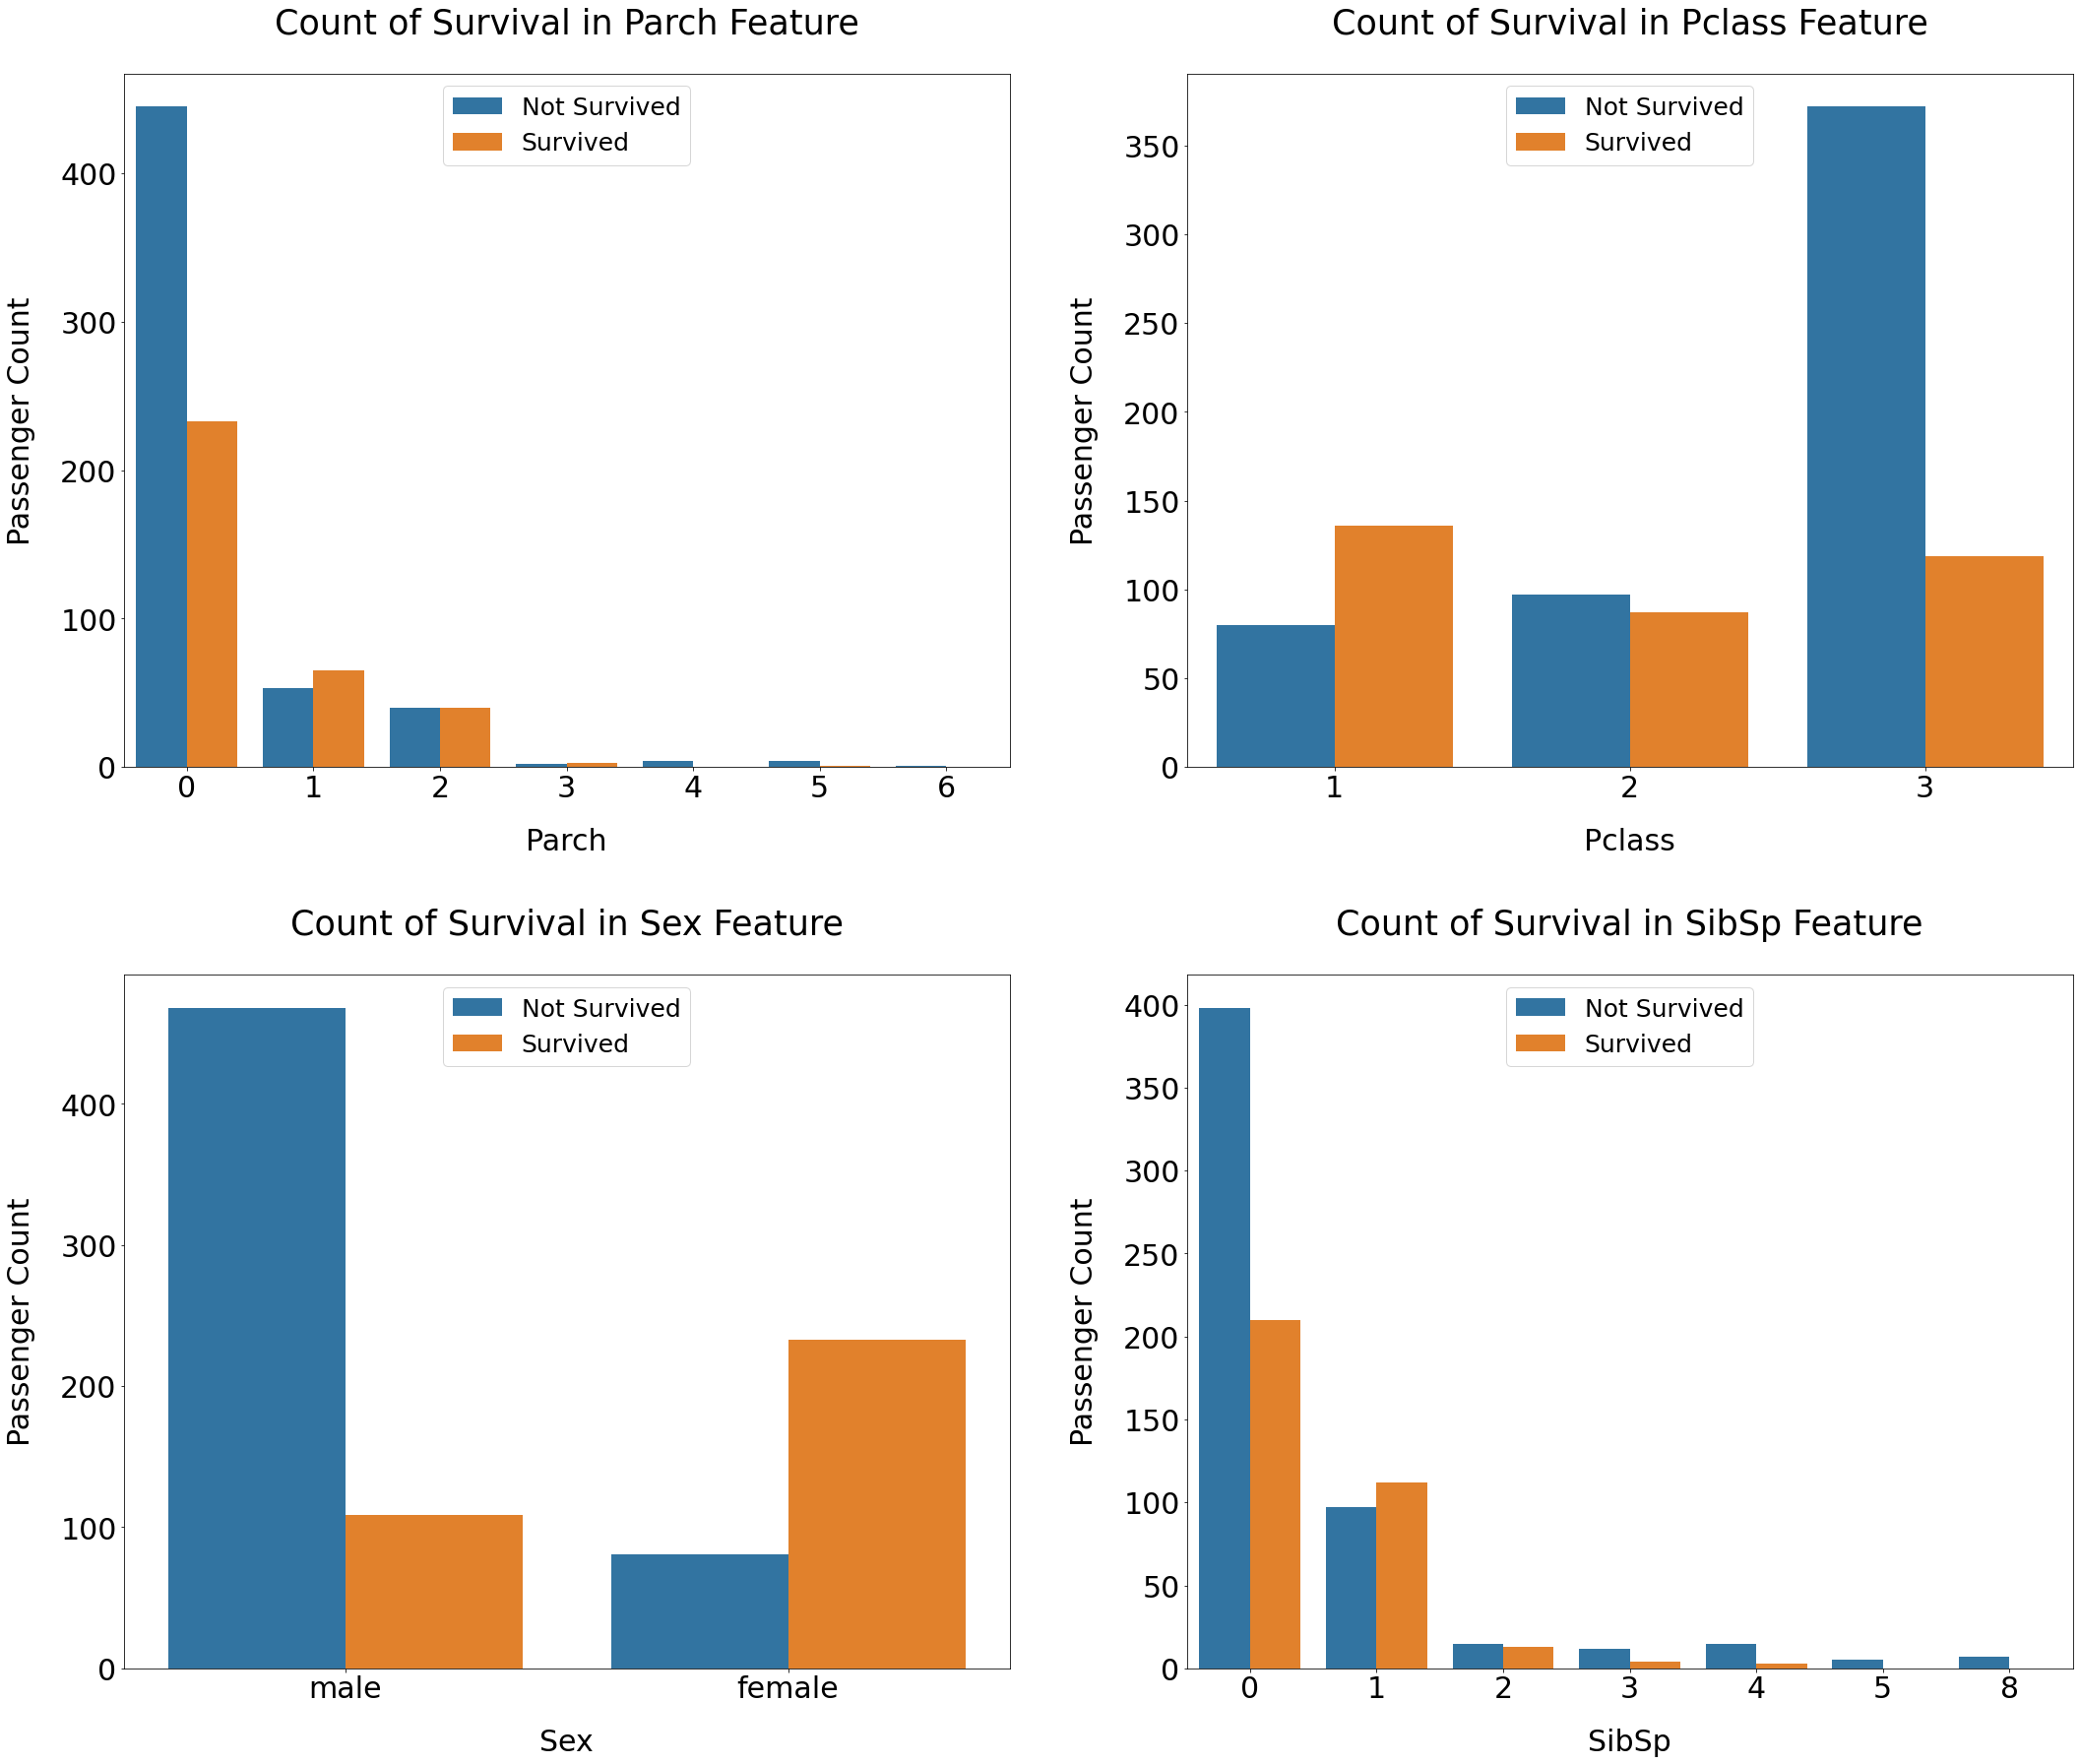

In [40]:
cat_features = ['Parch', 'Pclass', 'Sex', 'SibSp']

fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(20, 20))
plt.subplots_adjust(right=1.5, top=1.25)

for i, feature in enumerate(cat_features, 1):    
    plt.subplot(2, 2, i)
    sns.countplot(x=feature, hue='Survived', data=df_train)
    
    plt.xlabel('{}'.format(feature), size=30, labelpad=25)
    plt.ylabel('Passenger Count', size=30, labelpad=25)    
    plt.tick_params(axis='x', labelsize=30)
    plt.tick_params(axis='y', labelsize=30)
    
    plt.legend(['Not Survived', 'Survived'], loc='upper center', prop={'size': 25})
    plt.title('Count of Survival in {} Feature'.format(feature), size=35, y=1.05)

fig.subplots_adjust(hspace=0.3)

plt.show()

### Заключение.

Большинство признаков коррелируют друг с другом. Эта взаимосвязь может быть использована для создания новых признаков с помощью трансформации признаков и взаимодействия признаков. Кодирование цели также может быть очень полезным из-за высокой корреляции с функцией Survived.

Категориальные признаки имеют очень четкие распределения с различными коэффициентами выживаемости. Эти признаки могут быть закодированы. Некоторые из этих признаков можно объединить друг с другом, чтобы получить новые признаки.

---
---

### Проектирование характеристик.

##### Кодирование непрерывных характеристик.

Точки разделения и пики видны в непрерывных признаках на данных ниже.

##### Age / Возраст

Характеристика возраста имеет нормальное распределение с некоторыми пиками и скачками.

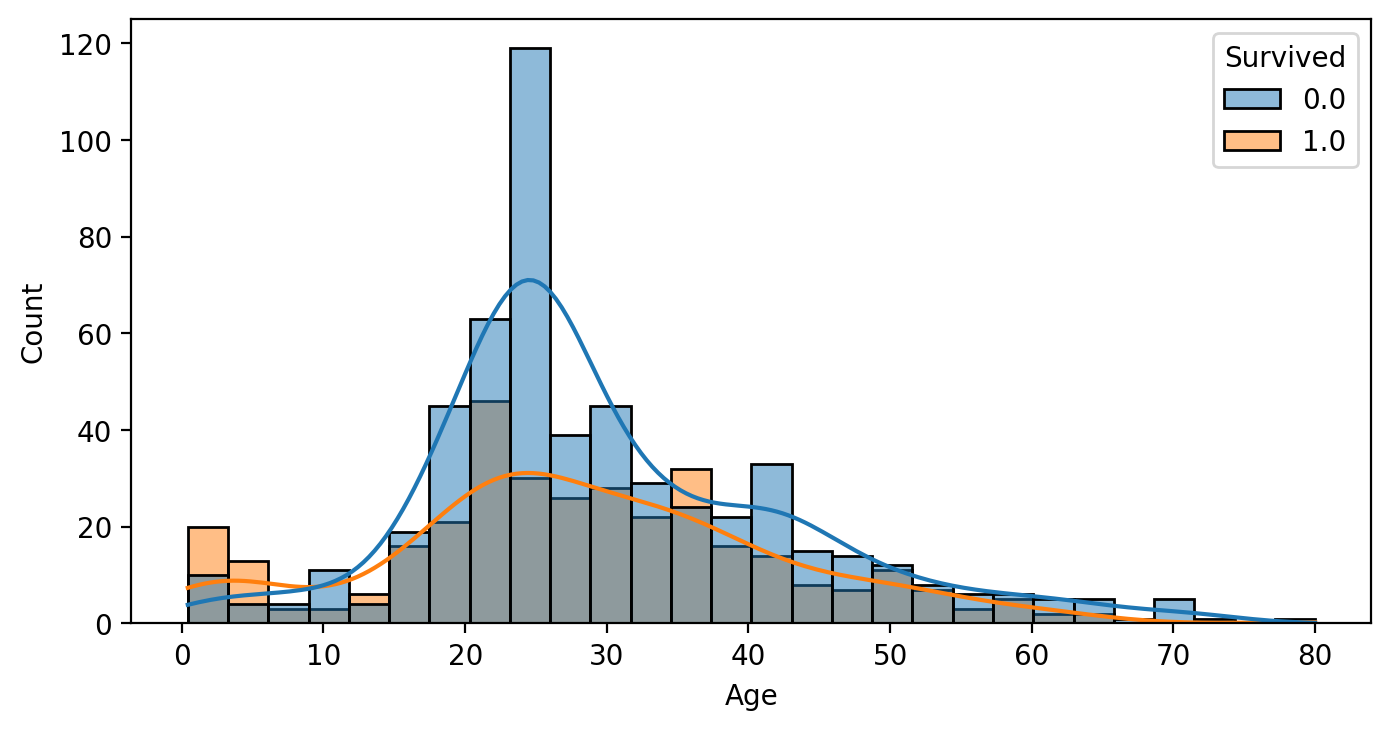

In [41]:
df_train = df[df['is_test']==0]

plt.figure(figsize=(8,4), dpi=200)
sns.histplot(data=df_train, kde=True, x='Age', hue='Survived');

Для возраста используются 10 квантилей. Первый бином имеет самый высокий уровень выживаемости, а 4-й бином - самый низкий уровень выживаемости. Это самые большие пики в распределении. Существует также необычная группа (34.0, 40.0] с высоким уровнем выживаемости, которая была захвачена в этом процессе.

In [42]:
df['Age'] = pd.qcut(df['Age'], 10)

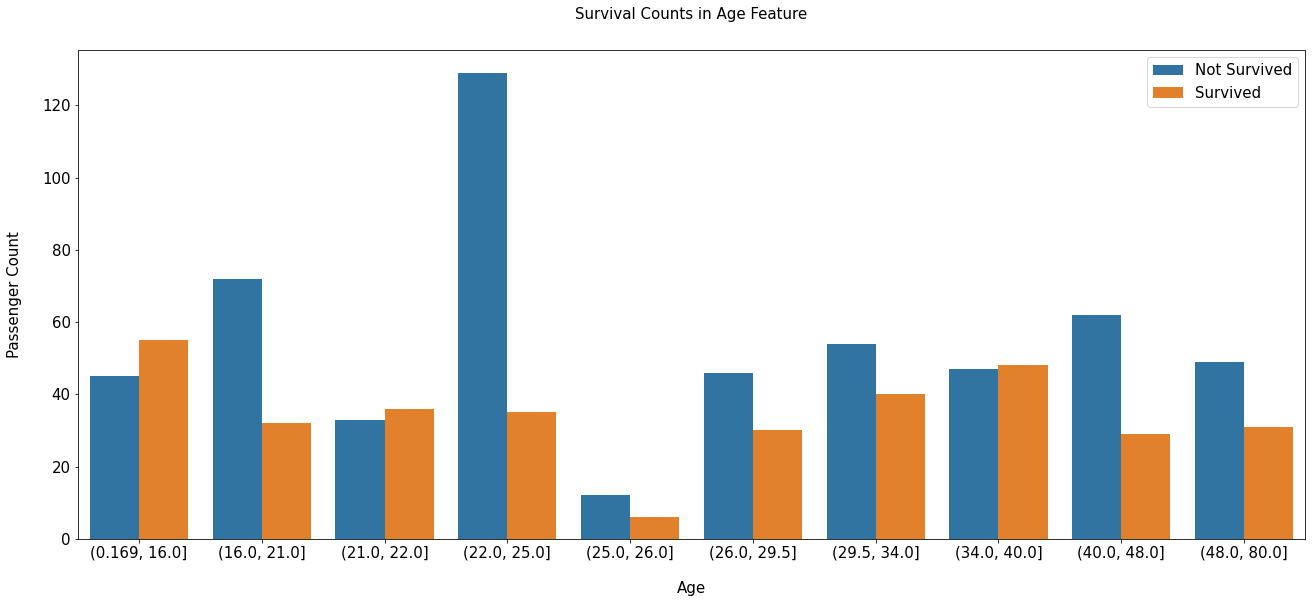

In [43]:
df_train = df[df['is_test']==0]

fig, axs = plt.subplots(figsize=(22, 9))
sns.countplot(x='Age', hue='Survived', data=df_train)

plt.xlabel('Age', size=15, labelpad=20)
plt.ylabel('Passenger Count', size=15, labelpad=20)
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)

plt.legend(['Not Survived', 'Survived'], loc='upper right', prop={'size': 15})
plt.title('Survival Counts in {} Feature'.format('Age'), size=15, y=1.05)

plt.show()

Переведем Age в категориальную переменную.

In [44]:
df["Age"] = df["Age"].cat.codes
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,is_test
0,1,0.0,3,"Braund, Mr. Owen Harris",male,2,1,0,A/5 21171,7.2500,0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,7,1,0,PC 17599,71.2833,0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,4,0,0,STON/O2. 3101282,7.9250,0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,7,1,0,113803,53.1000,0
4,5,0.0,3,"Allen, Mr. William Henry",male,7,0,0,373450,8.0500,0


##### Fare/ Тариф

Признак Fare имеет положительный перекос, а коэффициент выживаемости чрезвычайно высок на правом конце. 

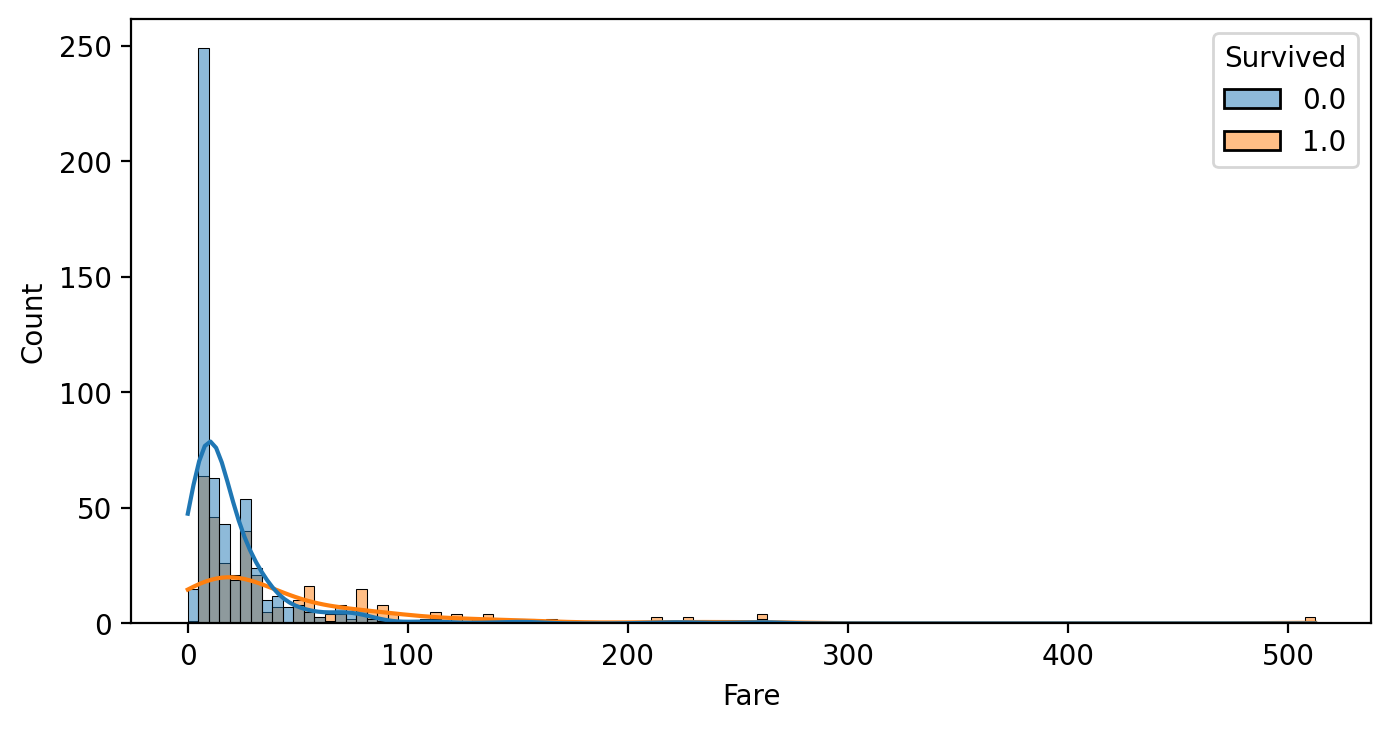

In [45]:
df_train = df[df['is_test']==0]

plt.figure(figsize=(8,4), dpi=200)
sns.histplot(data=df_train, kde=True, x='Fare', hue='Survived');

Для характеристики Fare используется 13 бинов на основе квантилей. Несмотря на то, что бины слишком велики, они обеспечивают приличный прирост информации. 
Группы в левой части графика имеют самый низкий уровень выживаемости, а группы в правой части графика имеют самый высокий уровень выживаемости. Этот высокий уровень выживаемости не был заметен на графике распределения. В середине также есть необычная группа (15.742, 23.25] с высоким коэффициентом выживаемости, которая была захвачена в этом процессе.

In [46]:
df['Fare'] = pd.qcut(df['Fare'], 13)

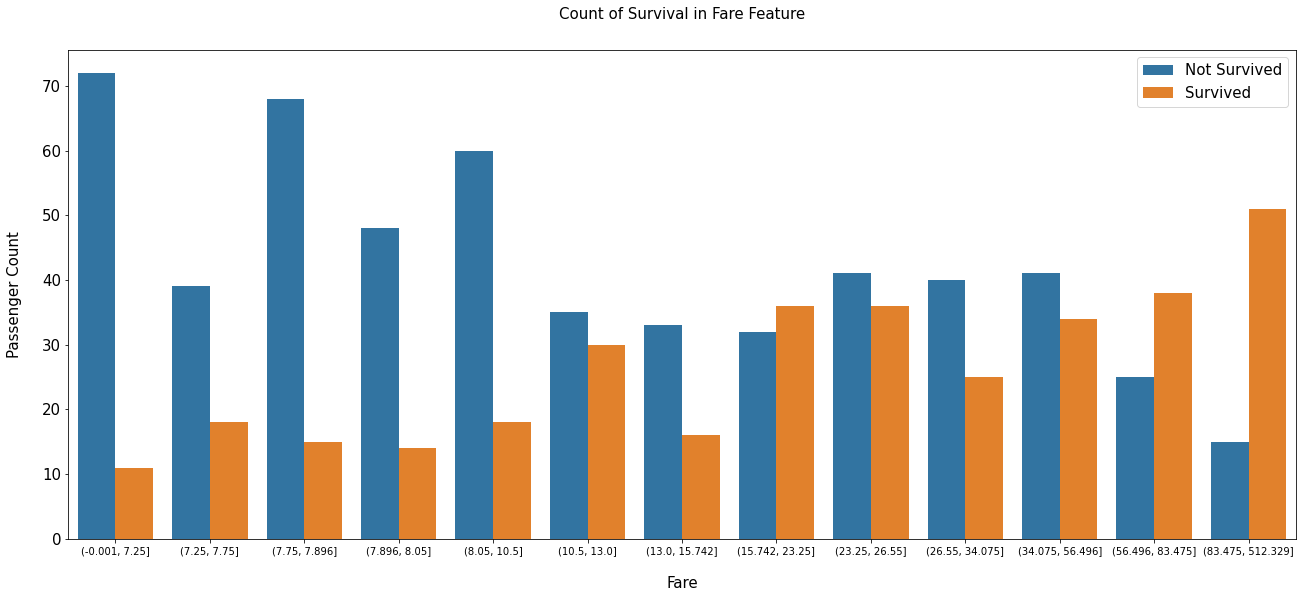

In [47]:
df_train = df[df['is_test']==0]

fig, axs = plt.subplots(figsize=(22, 9))
sns.countplot(x='Fare', hue='Survived', data=df_train)

plt.xlabel('Fare', size=15, labelpad=20)
plt.ylabel('Passenger Count', size=15, labelpad=20)
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=15)

plt.legend(['Not Survived', 'Survived'], loc='upper right', prop={'size': 15})
plt.title('Count of Survival in {} Feature'.format('Fare'), size=15, y=1.05)

plt.show()

Переведем Fare в категориальную переменную.

In [48]:
df["Fare"] = df["Fare"].cat.codes
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,is_test
0,1,0.0,3,"Braund, Mr. Owen Harris",male,2,1,0,A/5 21171,0,0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,7,1,0,PC 17599,11,0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,4,0,0,STON/O2. 3101282,3,0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,7,1,0,113803,10,0
4,5,0.0,3,"Allen, Mr. William Henry",male,7,0,0,373450,3,0


##### Частотное кодирование

Family_Size создается путем добавления SibSp, Parch и 1. SibSp - это количество братьев и сестер и супругов, а Parch - количество родителей и детей. Эти столбцы складываются для того, чтобы найти общий размер семьи. Добавив в конце 1, получаем текущего пассажира. Графики наглядно показали, что размер семьи является предиктором выживания, поскольку разные значения имеют разную выживаемость.

Размер семьи с 1 обозначен как Alone, семьи с размерами 2, 3 и 4 обозначены как Small, семьи с размерами 5 и 6 обозначены как Medium, семьи с размерами 7, 8 и 11 обозначены как Large.

In [49]:
df['Family_Size'] = df['SibSp'] + df['Parch'] + 1

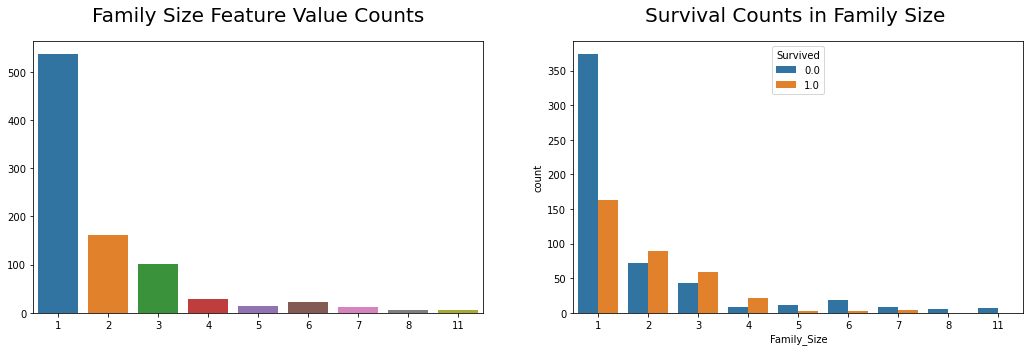

In [50]:
df_train = df[df['is_test']==0]

fig, axs = plt.subplots(figsize=(10, 5), ncols=2)
plt.subplots_adjust(right=1.5)

sns.barplot(x=df_train['Family_Size'].value_counts().index, y=df_train['Family_Size'].value_counts().values, ax=axs[0])
sns.countplot(x='Family_Size', hue='Survived', data=df_train, ax=axs[1])

axs[0].set_title('Family Size Feature Value Counts', size=20, y=1.05)
axs[1].set_title('Survival Counts in Family Size ', size=20, y=1.05)

plt.show()

In [51]:
family_map = {1: 'Alone', 2: 'Small', 3: 'Small', 4: 'Small', 5: 'Medium', 6: 'Medium', 7: 'Large', 8: 'Large', 11: 'Large'}

df['Family_Size_Grouped'] = df['Family_Size'].map(family_map)

Text(0.5, 1.05, 'Survival Counts in Family Size After Grouping')

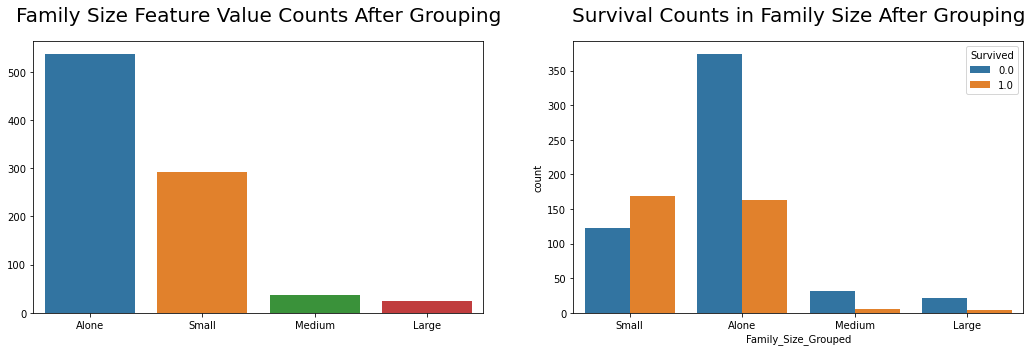

In [52]:
df_train = df[df['is_test']==0]

fig, axs = plt.subplots(figsize=(10, 5), ncols=2)
plt.subplots_adjust(right=1.5)

sns.barplot(x=df_train['Family_Size_Grouped'].value_counts().index, 
            y=df_train['Family_Size_Grouped'].value_counts().values, ax=axs[0])

sns.countplot(x='Family_Size_Grouped', hue='Survived', data=df_train, ax=axs[1])

axs[0].set_title('Family Size Feature Value Counts After Grouping', size=20, y=1.05)
axs[1].set_title('Survival Counts in Family Size After Grouping', size=20, y=1.05)

##### Уникальные значения билета / Ticket.

Существует слишком много уникальных значений Билета, чтобы их анализировать, поэтому группировка по частотам упрощает работу.

Чем эта функция отличается от Family_Size? Многие пассажиры путешествуют группами. Эти группы состоят из друзей, нянь, горничных и т.д. Их не считали за семью, но они пользовались одним и тем же билетом.

Почему бы не группировать билеты по их префиксам? Если префиксы в характеристике билета имеют какое-то значение, то они уже отражены в характеристиках Pclass, потому что это единственная логическая информация, которая может быть получена из характеристики билета.

Согласно приведенному ниже графику, группы с 2, 3 и 4 членами имели более высокий уровень выживаемости. Пассажиры, путешествующие в одиночку, имеют самый низкий уровень выживаемости. После 4 членов группы выживаемость резко снижается. Эта модель очень похожа на функцию Family_Size, но есть небольшие различия. 

Значения Ticket_Frequency не группируются, как Family_Size, потому что это создало бы ту же функцию с идеальной корреляцией. Такой признак не обеспечит никакого дополнительного прироста информации.

In [53]:
df['Ticket_Frequency'] = df.groupby('Ticket')['Ticket'].transform('count')

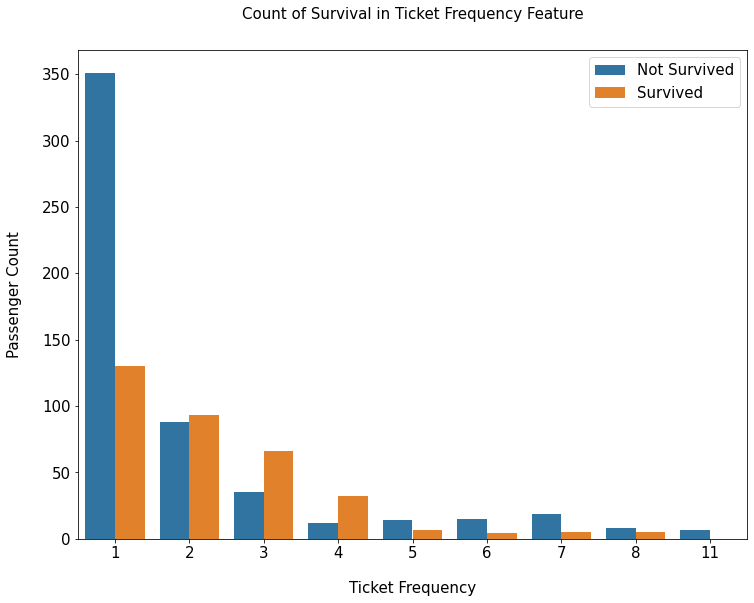

In [54]:
df_train = df[df['is_test']==0]

fig, axs = plt.subplots(figsize=(12, 9))
sns.countplot(x='Ticket_Frequency', hue='Survived', data=df_train)

plt.xlabel('Ticket Frequency', size=15, labelpad=20)
plt.ylabel('Passenger Count', size=15, labelpad=20)
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)

plt.legend(['Not Survived', 'Survived'], loc='upper right', prop={'size': 15})
plt.title('Count of Survival in {} Feature'.format('Ticket Frequency'), size=15, y=1.05)

plt.show()

##### Титул пассажиров.

Титул создается путем извлечения префикса перед характеристикой имени. Согласно графику ниже, есть много титулов, которые встречаются очень мало раз. Некоторые из этих титулов кажутся неправильными, и их необходимо заменить. 

Титулы Miss, Mrs, Ms, Mlle, Lady, Mme, the Countess, Dona заменяются на Miss/Mrs/Ms, поскольку все они женского рода. 

Такие значения, как Mlle, Mme и Dona, на самом деле являются именами пассажиров, но они классифицируются как титулы, потому что признак имени разделяется запятой. 

Титулы Dr, Col, Major, Jonkheer, Capt, Sir, Don и Rev заменяются на Dr/Military/Noble/Clergy, потому что эти пассажиры имеют схожие характеристики. 

Мастер - это уникальный титул. Оно присваивается пассажирам мужского пола в возрасте до 26 лет. У них самый высокий уровень выживаемости среди всех мужчин.

Is_Married - бинарный признак, основанный на титуле Mrs. Титул Mrs имеет самый высокий показатель выживаемости среди других женских титулов. Этот титул должен быть признаком, потому что все женские титулы сгруппированы друг с другом.

In [55]:
df['Title'] = df['Name'].str.split(', ', expand=True)[1].str.split('.', expand=True)[0]
df['Is_Married'] = 0
df['Is_Married'].loc[df['Title'] == 'Mrs'] = 1

C:\Users\79200\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


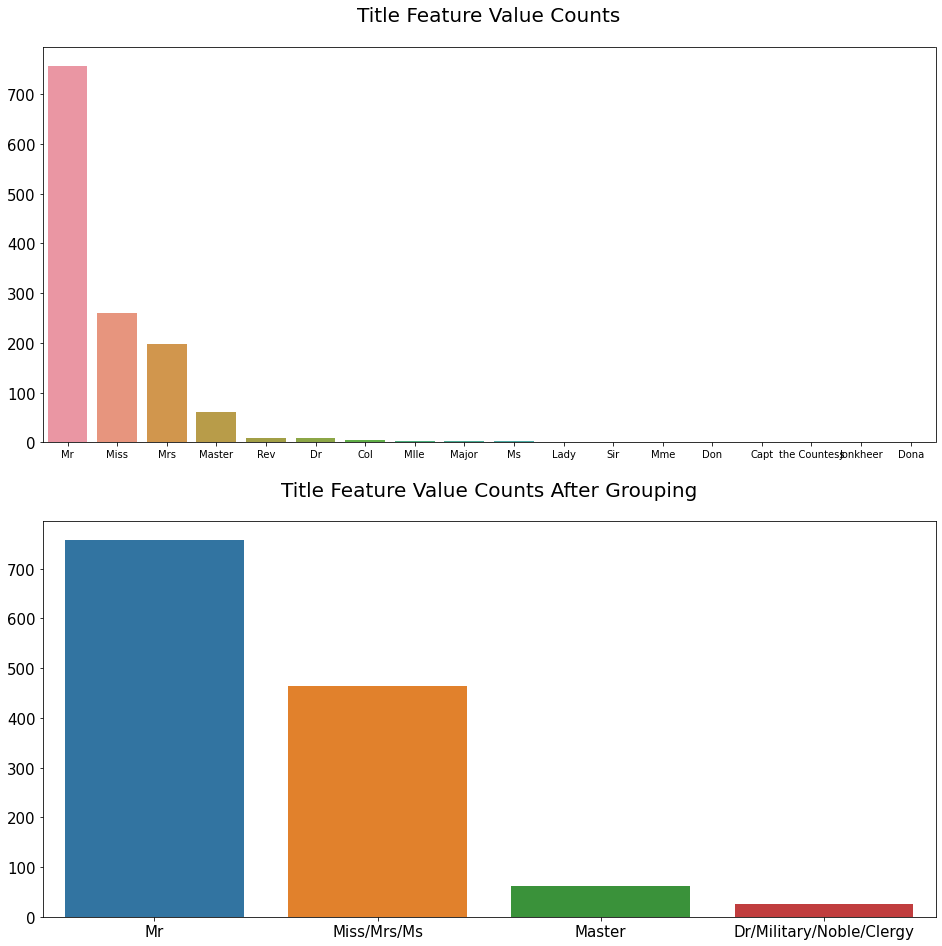

In [56]:
fig, axs = plt.subplots(nrows=2, figsize=(16, 16))
sns.barplot(x=df['Title'].value_counts().index, y=df['Title'].value_counts().values, ax=axs[0])

axs[0].tick_params(axis='x', labelsize=10)
axs[1].tick_params(axis='x', labelsize=15)

for i in range(2):    
    axs[i].tick_params(axis='y', labelsize=15)

axs[0].set_title('Title Feature Value Counts', size=20, y=1.05)

df['Title'] = df['Title'].replace(['Miss', 'Mrs','Ms', 'Mlle', 'Lady', 'Mme', 'the Countess', 'Dona'], 'Miss/Mrs/Ms')
df['Title'] = df['Title'].replace(['Dr', 'Col', 'Major', 'Jonkheer', 'Capt', 'Sir', 'Don', 'Rev'], 'Dr/Military/Noble/Clergy')

sns.barplot(x=df['Title'].value_counts().index, y=df['Title'].value_counts().values, ax=axs[1])
axs[1].set_title('Title Feature Value Counts After Grouping', size=20, y=1.05)

plt.show()

### Кодирование по целевому признаку. 

##### По уровню выживаемости из тренировочного набора.

Функция lambda используется для извлечения фамилий пассажиров из характеристики Name. Признак Family создается с извлеченной фамилией. Это необходимо для группировки пассажиров в одной семье.

In [57]:
df['Name'].apply(lambda name: name.split(',')[0]).value_counts()

Andersson    11
Sage         11
Goodwin       8
Asplund       8
Davies        7
             ..
Milling       1
Maisner       1
Goncalves     1
Campbell      1
Saether       1
Name: Name, Length: 875, dtype: int64

In [58]:
df['Family'] = df['Name'].apply(lambda name: name.split(',')[0])

In [59]:
df_train = df[df['is_test']==0].drop('is_test', axis=1)

df_test = df[df['is_test']==1].drop('is_test', axis=1)

Family_Survival_Rate рассчитывается на основе семей из обучающего набора, поскольку в тестовом наборе нет признака Survived. Создается список фамилий семей, которые встречаются как в обучающем, так и в тестовом множестве (non_unique_families). Для семей с более чем 1 членом в этом списке рассчитывается коэффициент выживаемости, который сохраняется в признаке Family_Survival_Rate.

Для семей, уникальных для тестового набора, создается дополнительный бинарный признак Family_Survival_Rate_NA. Эта функция также необходима, поскольку нет возможности рассчитать выживаемость этих семей. Этот признак подразумевает, что коэффициент выживаемости семьи не применим к этим пассажирам, потому что нет способа получить их коэффициент выживаемости.

Характеристики Ticket_Survival_Rate и Ticket_Survival_Rate_NA также создаются с помощью того же метода. Ticket_Survival_Rate и Family_Survival_Rate усредняются и становятся Survival_Rate, а Ticket_Survival_Rate_NA и Family_Survival_Rate_NA также усредняются и становятся Survival_Rate_NA.

##### Создание списка семей и билетов, которые встречаются как в обучающем, так и в тестовом наборе.

In [60]:
non_unique_families = [x for x in df_train['Family'].unique() if x in df_test['Family'].unique()]

In [61]:
non_unique_tickets = [x for x in df_train['Ticket'].unique() if x in df_test['Ticket'].unique()]

In [62]:
df_family_survival_rate = df_train.groupby('Family')['Survived', 'Family_Size'].median()

df_ticket_survival_rate = df_train.groupby('Ticket')['Survived', 'Ticket_Frequency'].median()

C:\Users\79200\AppData\Local\Temp/ipykernel_10400/1161161298.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_family_survival_rate = df_train.groupby('Family')['Survived', 'Family_Size'].median()
C:\Users\79200\AppData\Local\Temp/ipykernel_10400/1161161298.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_ticket_survival_rate = df_train.groupby('Ticket')['Survived', 'Ticket_Frequency'].median()


In [63]:
family_rates = {}
ticket_rates = {}

for i in range(len(df_family_survival_rate)):
    # Проверка наличия семейства как в обучающем, так и в тестовом множестве, а также наличия в нем более 1 члена
    if df_family_survival_rate.index[i] in non_unique_families and df_family_survival_rate.iloc[i, 1] > 1:
        family_rates[df_family_survival_rate.index[i]] = df_family_survival_rate.iloc[i, 0]

for i in range(len(df_ticket_survival_rate)):
    # Проверка наличия билета как в обучающем, так и в тестовом множестве, а также наличия членов более 1
    if df_ticket_survival_rate.index[i] in non_unique_tickets and df_ticket_survival_rate.iloc[i, 1] > 1:
        ticket_rates[df_ticket_survival_rate.index[i]] = df_ticket_survival_rate.iloc[i, 0]

In [64]:
mean_survival_rate = np.mean(df_train['Survived'])

train_family_survival_rate = []
train_family_survival_rate_NA = []
test_family_survival_rate = []
test_family_survival_rate_NA = []

for i in range(len(df_train)):
    if df_train['Family'][i] in family_rates:
        train_family_survival_rate.append(family_rates[df_train['Family'][i]])
        train_family_survival_rate_NA.append(1)
    else:
        train_family_survival_rate.append(mean_survival_rate)
        train_family_survival_rate_NA.append(0)
        
for i in range(len(df_test)):
    if df_test['Family'].iloc[i] in family_rates:
        test_family_survival_rate.append(family_rates[df_test['Family'].iloc[i]])
        test_family_survival_rate_NA.append(1)
    else:
        test_family_survival_rate.append(mean_survival_rate)
        test_family_survival_rate_NA.append(0)
        
df_train['Family_Survival_Rate'] = train_family_survival_rate
df_train['Family_Survival_Rate_NA'] = train_family_survival_rate_NA
df_test['Family_Survival_Rate'] = test_family_survival_rate
df_test['Family_Survival_Rate_NA'] = test_family_survival_rate_NA

In [65]:
train_ticket_survival_rate = []
train_ticket_survival_rate_NA = []
test_ticket_survival_rate = []
test_ticket_survival_rate_NA = []

for i in range(len(df_train)):
    if df_train['Ticket'][i] in ticket_rates:
        train_ticket_survival_rate.append(ticket_rates[df_train['Ticket'][i]])
        train_ticket_survival_rate_NA.append(1)
    else:
        train_ticket_survival_rate.append(mean_survival_rate)
        train_ticket_survival_rate_NA.append(0)
        
for i in range(len(df_test)):
    if df_test['Ticket'].iloc[i] in ticket_rates:
        test_ticket_survival_rate.append(ticket_rates[df_test['Ticket'].iloc[i]])
        test_ticket_survival_rate_NA.append(1)
    else:
        test_ticket_survival_rate.append(mean_survival_rate)
        test_ticket_survival_rate_NA.append(0)
        
df_train['Ticket_Survival_Rate'] = train_ticket_survival_rate
df_train['Ticket_Survival_Rate_NA'] = train_ticket_survival_rate_NA
df_test['Ticket_Survival_Rate'] = test_ticket_survival_rate
df_test['Ticket_Survival_Rate_NA'] = test_ticket_survival_rate_NA

In [66]:
df_train['Survival_Rate'] = (df_train['Ticket_Survival_Rate'] + df_train['Family_Survival_Rate']) / 2

df_train['Survival_Rate_NA'] = (df_train['Ticket_Survival_Rate_NA'] + df_train['Family_Survival_Rate_NA']) / 2  

In [67]:
df_test['Survival_Rate'] = (df_test['Ticket_Survival_Rate'] + df_test['Family_Survival_Rate']) / 2

df_test['Survival_Rate_NA'] = (df_test['Ticket_Survival_Rate_NA'] + df_test['Family_Survival_Rate_NA']) / 2  

In [68]:
df_train['is_test'] = 0
df_test['is_test'] = 1

In [69]:
df = pd.concat([df_train, df_test])

### Удаление ненужных признаков, которые использовались для создания новых признаков.

In [70]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Family_Size', 'Family_Size_Grouped',
       'Ticket_Frequency', 'Title', 'Is_Married', 'Family',
       'Family_Survival_Rate', 'Family_Survival_Rate_NA',
       'Ticket_Survival_Rate', 'Ticket_Survival_Rate_NA', 'Survival_Rate',
       'Survival_Rate_NA', 'is_test'],
      dtype='object')

In [71]:
df = df.drop(['Survived','Name', 'Ticket', 'Family','Family_Size', 'SibSp', 'Parch', 'Family_Survival_Rate', 
              'Family_Survival_Rate_NA', 'Ticket_Survival_Rate', 'Ticket_Survival_Rate_NA','Is_Married',
              'Survival_Rate_NA'], axis=1)

Признак PassengerId дублирует индекс и не нужен для модели предсказания. Он понадобится только для тестового набора.

In [72]:
PassengerId_test = df[df['is_test']==1]['PassengerId']

In [73]:
df = df.drop('PassengerId', axis=1)

Признак Pclass преобразуется в строковый, чтобы в дальнейшем его перекодировать.

In [74]:
df['Pclass'] = df['Pclass'].astype('object')

##### Преобразование признаков.

Категориальные признаки Pclass, Sex, Family_Size_Grouped, Title относятся к типу объектов. Они преобразуются кодировкой в отдельные бинарные признаки с помощью get_dummies. Этот процесс необходим для обучения моделей на этих признаках.

In [75]:
df = pd.get_dummies(df, prefix=['Pclass', 'Sex', 'Family_Size_Grouped', 'Title'])

In [76]:
df.transpose()

,0,1,2,3,4,5,6,7,8,9,...,1299,1300,1301,1302,1303,1304,1305,1306,1307,1308
Age,2.000000,7.0,4.000000,7.000000,7.000000,3.000000,9.000000,0.0,5.000000,0.000000,...,2.000000,0.000000,2.000000,7.0,5.000000,3.000000,7.000000,7.000000,3.000000,3.0
Fare,0.000000,11.0,3.000000,10.000000,3.000000,4.000000,10.000000,7.0,5.000000,9.000000,...,1.000000,6.000000,1.000000,12.0,2.000000,3.000000,12.000000,0.000000,3.000000,7.0
Ticket_Frequency,1.000000,2.0,1.000000,2.000000,1.000000,1.000000,2.000000,5.0,3.000000,2.000000,...,1.000000,3.000000,1.000000,3.0,1.000000,1.000000,3.000000,1.000000,1.000000,3.0
Survival_Rate,0.383838,1.0,0.383838,0.383838,0.383838,0.383838,0.191919,0.0,0.383838,0.383838,...,0.383838,0.383838,0.383838,0.5,0.383838,0.383838,0.441919,0.383838,0.383838,1.0
is_test,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.0
Pclass_1,0.000000,1.0,0.000000,1.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.0
Pclass_2,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
Pclass_3,1.000000,0.0,1.000000,0.000000,1.000000,1.000000,0.000000,1.0,1.000000,0.000000,...,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,0.000000,1.000000,1.000000,1.0
Sex_female,0.000000,1.0,1.000000,1.000000,0.000000,0.000000,0.000000,0.0,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.0,1.000000,0.000000,1.000000,0.000000,0.000000,0.0
Sex_male,1.000000,0.0,0.000000,0.000000,1.000000,1.000000,1.000000,1.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,1.000000,1.000000,1.0


### Сохранение обработанных данных.

In [77]:
df.to_csv('df.csv', index=False)

In [78]:
df = pd.read_csv('df.csv')

### Подготовка данных и стандартизация.

In [79]:
X = df[df['is_test']==0].drop('is_test', axis=1)

y = train['Survived']

test = df[df['is_test']==1].drop('is_test', axis=1)

In [80]:
from sklearn.model_selection import train_test_split

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01, random_state=101)

In [82]:
from sklearn.preprocessing import StandardScaler

In [83]:
scaler = StandardScaler()

In [84]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

### Модель и ее выбор.

Модель на основе RandomForestClassifier показала себя, лучше всего. 

Параметры подобраны с помощью перекрестного поиска сетки по сетке параметров (GridSearchCV).

In [85]:
from sklearn.ensemble import RandomForestClassifier

In [86]:
single_best_model = RandomForestClassifier(criterion='gini', 
                                           n_estimators=1100,
                                           max_depth=5,
                                           min_samples_split=4,
                                           min_samples_leaf=5,
                                           max_features='auto',
                                           oob_score=True,
                                           random_state=42,
                                           n_jobs=-1,
                                           verbose=1)

In [87]:
single_best_model.fit(X_train,y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 1100 out of 1100 | elapsed:    0.8s finished


RandomForestClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=4,
                       n_estimators=1100, n_jobs=-1, oob_score=True,
                       random_state=42, verbose=1)

In [88]:
single_best_model.oob_score_

0.8458049886621315

In [89]:
from sklearn.metrics import classification_report,plot_confusion_matrix,accuracy_score

In [90]:
predictions = single_best_model.predict(X_test)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 1100 out of 1100 | elapsed:    0.0s finished


In [91]:
from sklearn.metrics import accuracy_score,plot_confusion_matrix,classification_report

In [92]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       1.00      0.75      0.86         4

    accuracy                           0.89         9
   macro avg       0.92      0.88      0.88         9
weighted avg       0.91      0.89      0.89         9



[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 1100 out of 1100 | elapsed:    0.0s finished


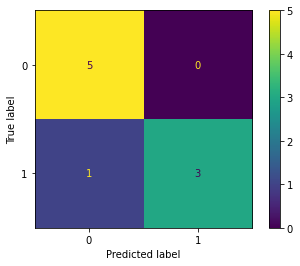

In [93]:
plot_confusion_matrix(single_best_model,X_test,y_test)

### Важные признаки.

In [94]:
feat_import = single_best_model.feature_importances_

In [95]:
imp_feats = pd.DataFrame(index=X.columns,data=feat_import,columns=['Importance'])

In [96]:
imp_feats.sort_values('Importance')

,Importance
Family_Size_Grouped_Large,0.004179
Title_Dr/Military/Noble/Clergy,0.005585
Family_Size_Grouped_Alone,0.005808
Pclass_2,0.011335
Family_Size_Grouped_Medium,0.011494
Title_Master,0.015577
Family_Size_Grouped_Small,0.019160
Age,0.024392
Pclass_1,0.037194
Ticket_Frequency,0.040969


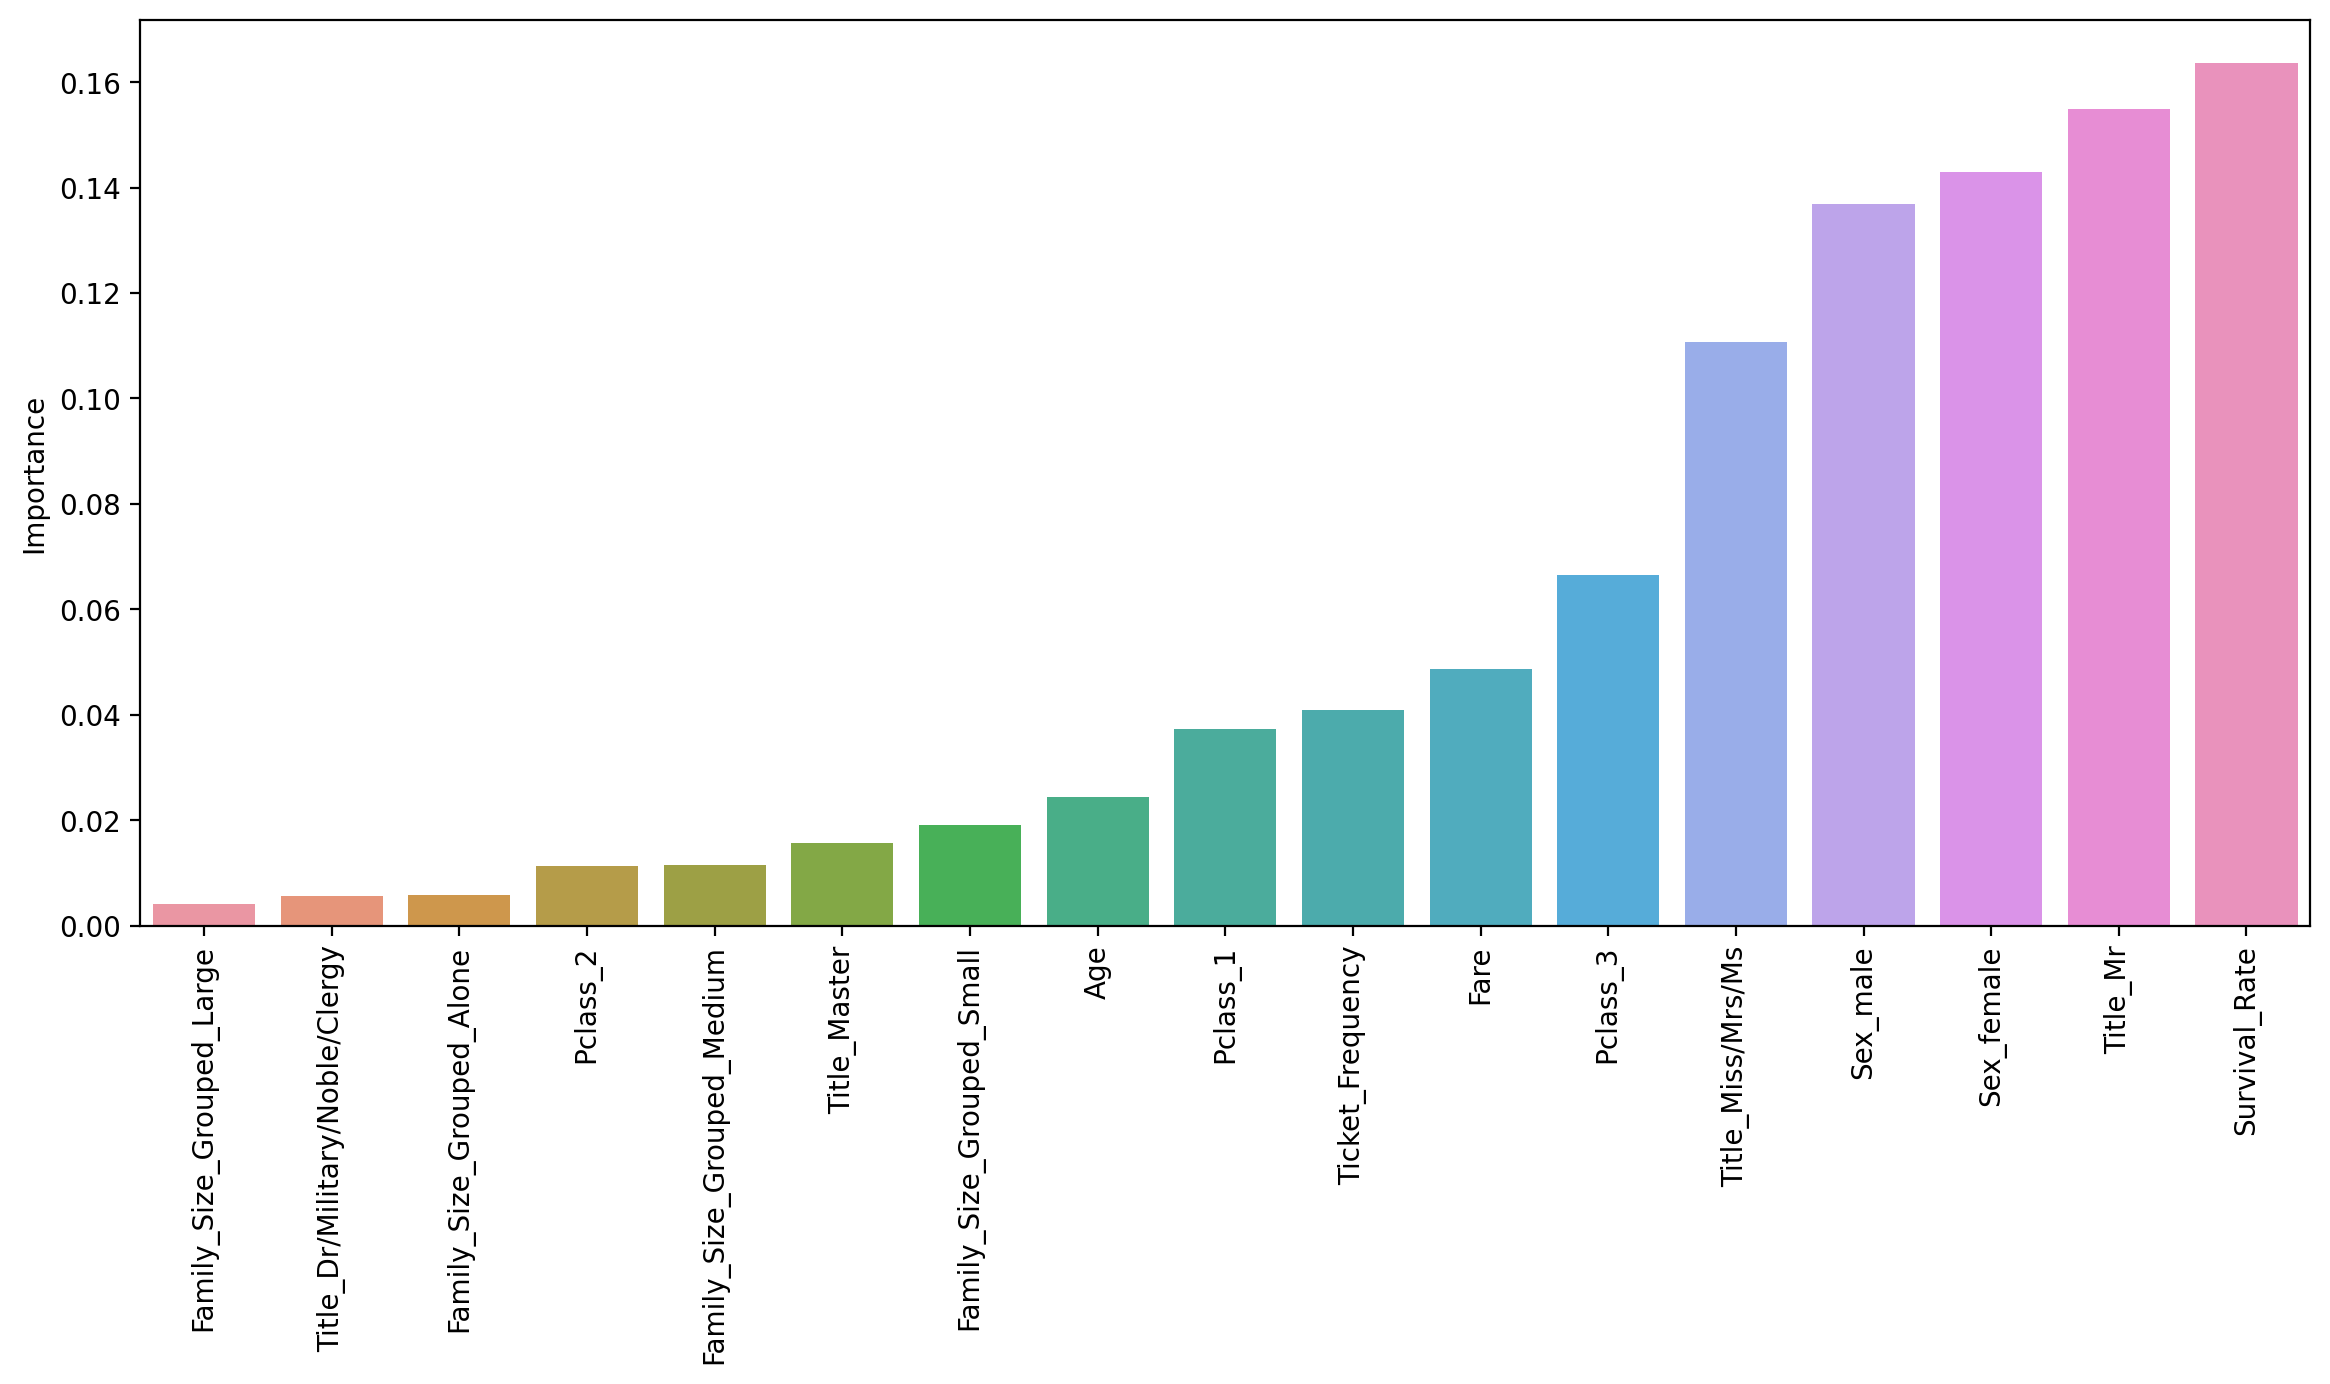

In [97]:
plt.figure(figsize=(14,6),dpi=200)
sns.barplot(data=imp_feats.sort_values('Importance'),x=imp_feats.sort_values('Importance').index,y='Importance')
plt.xticks(rotation=90);

### Предсказание для тестового набора целевого значения Survived.

In [98]:
test = test.reset_index(drop=True)

In [99]:
scaled_test = scaler.fit_transform(test)

In [100]:
test['Survived'] = single_best_model.predict(scaled_test)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 1100 out of 1100 | elapsed:    0.0s finished


<AxesSubplot:xlabel='Survived', ylabel='count'>

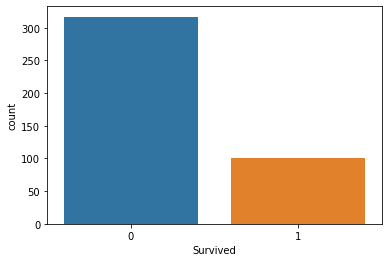

In [101]:
sns.countplot(data=test, x='Survived')

In [102]:
submission_df = test['Survived']

In [103]:
PassengerId_test = PassengerId_test.reset_index(drop=True)

In [104]:
submission_df = pd.concat([PassengerId_test, submission_df], axis=1)

In [105]:
submission_df.to_csv('submission.csv', index=False)

In [106]:
submission_df = pd.read_csv('submission.csv')

In [107]:
submission_df

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


---
---